<a href="https://colab.research.google.com/github/camiloacr1322/Taller_python_tres_integrantes_TPC/blob/main/TallerPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpieza de la base

1) Se importan las librerias necesarias para el analisis pedido por la empresa.

In [1]:
# calidad datos.py
import pandas as pd
import numpy as n

2) Cargamos la base de datos, le asignamos el nombre df. Se necesita cargar la base de datos (JEFAB_2024.xlsx) en el colab para que funcione el codigo.

In [2]:
# Leer los datos
df = pd.read_excel('/content/JEFAB_2024.xlsx')


3) Se hace un analisis exploratorio de datos faltantes en toda la base.


Se obtienen las 11 colunmas con más faltantes, como se observa que hay dos variables con el 60% de faltantes las cuales son(NUMERO_PERSONAS_APORTE_SOSTENIMIENTO2,NUMERO_HABITAN_VIVIENDA2), tambien dos con el 50% ( NUMERO_HIJOS,HIJOS_EN_HOGAR), estas cuatro siendo las más precupantes por el porcentaje tan alto de faltantes. Por lo que toca analaizar estas variables para saber porque su alto porcentaje de faltantes y decidir que hacer.


Por otro lado hay variables con 30%,13% y 0.2%, obteniendo un porcentaje trabajable en caso que se decida imputar.

Solo hay 10 variables con faltantes en la base de datos.

In [3]:
# Análisis de datos faltantes
print("=== ANÁLISIS DE DATOS FALTANTES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100


print("Top 11 columnas con más datos faltantes:")
missing_info = pd.DataFrame({
'Columna': missing_data.index,
'Datos_Faltantes': missing_data.values,
'Porcentaje': missing_percent.values
}).sort_values('Datos_Faltantes', ascending=False)
print(missing_info.head(11))

=== ANÁLISIS DE DATOS FALTANTES ===
Top 11 columnas con más datos faltantes:
                                   Columna  Datos_Faltantes  Porcentaje
213  NUMERO_PERSONAS_APORTE_SOSTENIMIENTO2             3928   61.155223
212               NUMERO_HABITAN_VIVIENDA2             3808   59.286938
31                            NUMERO_HIJOS             3217   50.085630
32                          HIJOS_EN_HOGAR             3200   49.820956
216                       EDAD_RANGO_PADRE             1939   30.188385
17                              EDAD_PADRE             1939   30.188385
215                       EDAD_RANGO_MADRE              889   13.840884
13                              EDAD_MADRE              885   13.778608
7                                    EDAD2               13    0.202398
214                             EDAD_RANGO               13    0.202398
4                                   CUERPO                0    0.000000


Se hace un analisis de duplicados y se obtiene cero duplicados en la base de datos

In [4]:
# Análisis de duplicados
print(f"\n=== ANÁLISIS DE DUPLICADOS ===")
print(f"Registros duplicados: {df.duplicated().sum()}")


=== ANÁLISIS DE DUPLICADOS ===
Registros duplicados: 0


Se observa el analisis de las variables y se obtiene 153 variables tipo cuantitativa discreta, 66 tipo cualitativa y 12 tipo cuantitativa continua.

In [5]:
# Análisis de tipos de datos
print(f"\n=== TIPOS DE DATOS ===")
print(df.dtypes.value_counts())


=== TIPOS DE DATOS ===
int64      153
object      66
float64     12
Name: count, dtype: int64


No se encuentra ninguna columna problematica

In [6]:
# Identificar columnas problemáticas
print(f"\n=== COLUMNAS CON CARACTERES ESPECIALES ===")
problematic_columns = [col for col in df.columns if 'Ã' in col or 'â' in col]
print(f"Columnas con encoding problemático: {len(problematic_columns)}")
for col in problematic_columns[:5]:
  print(f"- {col}")


=== COLUMNAS CON CARACTERES ESPECIALES ===
Columnas con encoding problemático: 0


4) Le pido a mis analistas(Familiar, Demografico) que me digan que variables van a utilizar, esto para saber que variables son las más importantes para el analisis y limpiarlas o imputarlas en caso necesario.

Ellos me piden 20 variables. Se observara una nueva base de datos

In [7]:
df_variables=df.loc[:, ['ID','UNIDAD','CATEGORIA','EDAD2','SEXO','FRECUENCIA_VISITA_FAMILIAR', 'ESTADO_CIVIL','HIJOS','NUMERO_HIJOS','HIJOS_EN_HOGAR','RELACION_HIJOS','HERMANOS','ESPECIFICACION_CASADO','CASADO_FUERZA_MILITAR','TIPO_RELACION_PAREJA','RELACION_PAREJA_ESTABLE','PRINCIPAL_NECESIDAD_FAMILIAR' ,'MALTRATO_INTRAFAMILIAR','NUMERO_HABITAN_VIVIENDA2','FRECUENCIA_VISITA_FAMILIAR']]


5) Se hace el mismo anlisis que con la base de datos original.

Por lo que quedan 3 variables con 50% o más de faltantes, en el informe se explican que tienen estas variables y porque el alto porcentaje de faltantes, por lo que se soluciona hablando con los expertos y se decide no trabajar con(NUMERO_HABITAN_VIVIENDA2), las otras dos es hacerles una limpieza.

In [8]:
# Análisis de datos faltantes
print("=== ANÁLISIS DE DATOS FALTANTES ===")
missing_data = df_variables.isnull().sum()
missing_percent = (missing_data / len(df_variables)) * 100


print("Top 5 columnas con más datos faltantes:")
missing_info = pd.DataFrame({
'Columna': missing_data.index,
'Datos_Faltantes': missing_data.values,
'Porcentaje': missing_percent.values
}).sort_values('Datos_Faltantes', ascending=False)
print(missing_info.head(5))

=== ANÁLISIS DE DATOS FALTANTES ===
Top 5 columnas con más datos faltantes:
                     Columna  Datos_Faltantes  Porcentaje
18  NUMERO_HABITAN_VIVIENDA2             3808   59.286938
8               NUMERO_HIJOS             3217   50.085630
9             HIJOS_EN_HOGAR             3200   49.820956
3                      EDAD2               13    0.202398
2                  CATEGORIA                0    0.000000


Con esta base de datos, son 15 variables cualitativas, 1 cuantitativa discreta, y 4 cuantitativas continuas

In [9]:
# Análisis de tipos de datos
print(f"\n=== TIPOS DE DATOS ===")
print(df_variables.dtypes.value_counts())


=== TIPOS DE DATOS ===
object     15
float64     4
int64       1
Name: count, dtype: int64


6) Limpieza de la base de datos nueva

Se carga librerias necesarias para limpiar caracteres en las observaciones

In [10]:
# calidad_datos.py

import unicodedata
import re   # Import necesario para expresiones regulares



In [13]:
# ================== 3. FUNCIONES DE LIMPIEZA ==================
reemplazos = {
    "Ã¡": "á", "Ã©️": "é", "Ã­": "í", "Ã³": "ó", "Ãº": "ú",
    "Ã": "Á", "Ã‰": "É", "Ã": "Í", "Ã“": "Ó", "Ãš": "Ú",
    "Ã±": "ñ", "Ã‘": "Ñ", "Ã¼": "ü", "Ãœ": "Ü"
}

def corregir_encoding(s: str) -> str:
    """Corrige caracteres mal codificados"""
    if not isinstance(s, str):
        return s
    for k, v in reemplazos.items():
        s = s.replace(k, v)
    return s

def normalizar_texto(s):
    """Pasa a minúsculas, corrige encoding y elimina acentos"""
    if pd.isna(s):
        return s
    s = str(s)
    s = corregir_encoding(s)
    s = ''.join(c for c in unicodedata.normalize('NFKD', s)
                if not unicodedata.combining(c))
    return s.strip().lower()

# Diccionario de agrupamiento
map_categorias = {
    "Madre": ["mama", "mamá", "madre"],
    "Padre": ["papa", "papá", "padre"],
    "Tio": ["tio", "tío"],
    "Tia": ["tia", "tía"],
    "Primo": ["primo"],
    "Prima": ["prima"],
    "Abuelo": ["abuelo"],
    "Abuela": ["abuela"],
    "Madres": ["mamas", "mamás", "madres"],
    "Padres": ["papas", "papás", "padres"],
    "Tios": ["tios", "tíos"],
    "Tias": ["tias", "tías"],
    "Primos": ["primos"],
    "Primas": ["primas"],
    "Abuelos": ["abuelos"],
    "Abuelas": ["abuelas"]
}

# Invertir mapeo (variantes -> canon)
canon_map = {}
for canon, variantes in map_categorias.items():
    for v in variantes:
        canon_map[normalizar_texto(v)] = canon

# ================== 4. AGRUPAMIENTO DE VARIANTES ==================
text_cols = df.select_dtypes(include=['object']).columns
agrupamientos = {}
for col in text_cols:
    valores = df[col].dropna().astype(str).unique()
    agrupados = {}
    for val in valores:
        norm = normalizar_texto(val)
        canon = canon_map.get(norm, val)
        agrupados.setdefault(canon, []).append(val)
    agrupamientos[col] = {k: v for k, v in agrupados.items() if len(v) > 1}

print("\n=== AGRUPAMIENTO DE VARIANTES (Singular/Plural/Género) ===")
for col, grupos in agrupamientos.items():
    if grupos:
        print(f"\nColumna: {col}")
        for canon, variantes in grupos.items():
            print(f"  → {canon}: {variantes}")

# ================== 5. CREAR DATASET CORREGIDO ==================
df_corregido = df.copy()

for col in text_cols:
    # Normalizar y limpiar
    df_corregido[col] = df_corregido[col].astype(str).apply(lambda x: normalizar_texto(x) if x != 'nan' else n.nan)
    # Quitar espacios extra en listas separadas por ";"
    df_corregido[col] = df_corregido[col].str.replace(r'\s*;\s*', ';', regex=True)
    # Unificar categorías conocidas
    df_corregido[col] = df_corregido[col].apply(
        lambda x: canon_map.get(x, x) if isinstance(x, str) else x
    )

df_limpio_con_variables=df_corregido.loc[:, ['ID','UNIDAD','CATEGORIA','EDAD2','SEXO','FRECUENCIA_VISITA_FAMILIAR', 'ESTADO_CIVIL','HIJOS','NUMERO_HIJOS','HIJOS_EN_HOGAR','RELACION_HIJOS','HERMANOS','ESPECIFICACION_CASADO','CASADO_FUERZA_MILITAR','TIPO_RELACION_PAREJA','RELACION_PAREJA_ESTABLE','PRINCIPAL_NECESIDAD_FAMILIAR' ,'MALTRATO_INTRAFAMILIAR','NUMERO_HABITAN_VIVIENDA2','FRECUENCIA_VISITA_FAMILIAR']]
df_limpio_con_variables.to_excel("JEFAB_limpio_con_variables.xlsx", index=False)
print("\n>>> Dataset corregido guardado como 'JEFAB_2024_corregido.xlsx'")


=== AGRUPAMIENTO DE VARIANTES (Singular/Plural/Género) ===

Columna: PARENTESCO_FALLECIMIENTO
  → Abuelo: ['ABUELO', 'Abuelo', 'abuelo']
  → Tios: ['TÃ\xados', 'tios', 'Tios', 'TIOS']
  → Tia: ['TÃ\xada', 'TIA', 'tia', 'Tia', 'tÃ\xada']
  → Abuela: ['ABUELA', 'Abuela', 'abuela']
  → Tio: ['Tio', 'TÃ\xado', 'TIO', 'tio', 'tÃ\xado']
  → Madre: ['Madre', 'MADRE', 'MamÃ¡', 'madre', 'Mama', 'MAMÃ\x81', 'mamÃ¡']
  → Prima: ['Prima', 'PRIMA']
  → Abuelos: ['Abuelos', 'abuelos', 'ABUELOS']
  → Padre: ['PapÃ¡', 'Padre', 'PADRE', 'padre', 'PAPÃ\x81', 'Papa', 'PAPA']
  → Primo: ['PRIMO', 'Primo', 'primo']
  → Padres: ['Padres', 'PADRES', 'padres']
  → Tias: ['TIAS', 'TÃ\xadas', 'Tias']
  → Abuelas: ['Abuelas', 'abuelas']

>>> Dataset corregido guardado como 'JEFAB_2024_corregido.xlsx'


7) Corregir problemas de omision de digitación

En las variables(NUMERO_HABITAN_VIVIENDA2, NUMERO_HIJOS) tienen un problema, el cual si en la variable HIJOS se responde que no, en estas dos variables las dejan en NA, esto esta mal hecho, en esas dos variables si en HIJOS se responde no, se debe poner 0, asi que cambiaremos eso

In [14]:
JEFAB_LISTO = df_limpio_con_variables.copy()

# Si HIJOS == "no", poner 0 en NUMERO_HIJOS
JEFAB_LISTO ["NUMERO_HIJOS"] = n.where(JEFAB_LISTO["HIJOS"] == "no", 0, JEFAB_LISTO["NUMERO_HIJOS"])

# Si HIJOS == "no", poner 0 en HIJOS_EN_HOGAR
JEFAB_LISTO ["HIJOS_EN_HOGAR"] = n.where(JEFAB_LISTO["HIJOS"] == "no", 0, JEFAB_LISTO["HIJOS_EN_HOGAR"])


Se quita del analisis la variable (NUMERO_HABITAN_VIVIENDA2), por las incongruencias de la variable, se ecxplica mejor en el informe.

In [15]:
JEFAB_LISTO=JEFAB_LISTO.drop(columns=['NUMERO_HABITAN_VIVIENDA2'])

In [16]:
# Análisis de datos faltantes
print("=== ANÁLISIS DE DATOS FALTANTES ===")
missing_data = JEFAB_LISTO.isnull().sum()
missing_percent = (missing_data / len(JEFAB_LISTO)) * 100


print("Top 5 columnas con más datos faltantes:")
missing_info = pd.DataFrame({
'Columna': missing_data.index,
'Datos_Faltantes': missing_data.values,
'Porcentaje': missing_percent.values
}).sort_values('Datos_Faltantes', ascending=False)
print(missing_info.head(5))

=== ANÁLISIS DE DATOS FALTANTES ===
Top 5 columnas con más datos faltantes:
          Columna  Datos_Faltantes  Porcentaje
8    NUMERO_HIJOS              463    7.208470
9  HIJOS_EN_HOGAR              446    6.943796
3           EDAD2               13    0.202398
2       CATEGORIA                0    0.000000
1          UNIDAD                0    0.000000


No se utilizan NA es la base que vamos a usar por lo cual los retiramos.

8) Exportación de base de datos a usar por los dos expertos

In [ ]:
JEFAB_LISTO= JEFAB_LISTO.dropna()

JEFAB_LISTO.to_excel("JEFAB_LISTO.xlsx", index=False)

### Análisis demográfico

In [24]:
# Paquete
import matplotlib.pyplot as plt

In [17]:
 # Leer los datos
 df = pd.read_excel('/content/JEFAB_LISTO.xlsx')
 df.head()

,ID,UNIDAD,CATEGORIA,EDAD2,SEXO,FRECUENCIA_VISITA_FAMILIAR,ESTADO_CIVIL,HIJOS,NUMERO_HIJOS,HIJOS_EN_HOGAR,RELACION_HIJOS,HERMANOS,ESPECIFICACION_CASADO,CASADO_FUERZA_MILITAR,TIPO_RELACION_PAREJA,RELACION_PAREJA_ESTABLE,PRINCIPAL_NECESIDAD_FAMILIAR,MALTRATO_INTRAFAMILIAR,FRECUENCIA_VISITA_FAMILIAR.1
0,5625,cacom-1,suboficial,22,hombre,mas de 5 veces al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,no responde,no,no aplica,si,mas de 5 veces al ano
1,5627,cacom-1,suboficial,20,hombre,1 vez al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,no responde,no,tiempo para compartir,no,1 vez al ano
2,4781,cacom-1,suboficial,45,hombre,3 veces al ano,casado,si,2,2,cercana,si,esposa/o civil externo a la institucion,no responde,cercana,si,union,no,3 veces al ano
3,5632,cacom-1,suboficial,22,hombre,mas de 5 veces al ano,soltero/a,no,0,0,no responde,si,no responde,no responde,cercana,si,tiempo para compartir,no,mas de 5 veces al ano
4,5635,cacom-1,civil,51,mujer,no aplica,casado,si,1,1,cercana,si,esposa/o civil externo a la institucion,no responde,cercana,si,no aplica,no,no aplica


In [18]:
print(df["SEXO"].unique())
print(df["SEXO"].value_counts())

['hombre' 'mujer']
SEXO
hombre    4127
mujer     1804
Name: count, dtype: int64


Podemos evidenciar que la cantidad de hombres es considerablemente mayor a la de las mujeres, más del doble.

=== INFORMACIÓN GENERAL ===
Total de registros: 5931
Total de columnas: 19

=== ANÁLISIS DE EDAD ===
Edad promedio: 36.3 años
Edad mínima: 18 años
Edad máxima: 68 años

=== ANÁLISIS DE GÉNERO ===
SEXO
hombre    4127
mujer     1804
Name: count, dtype: int64


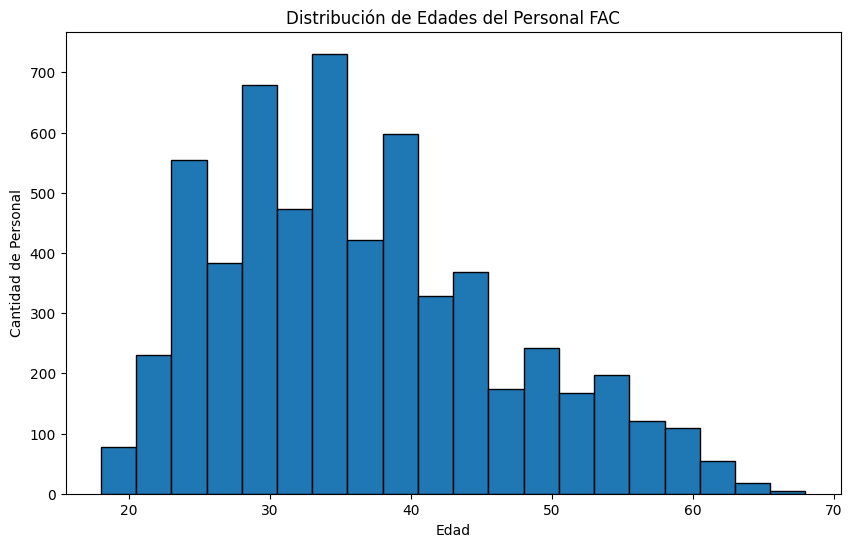

In [25]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
# Análisis de edad
print("\n=== ANÁLISIS DE EDAD ===")
print(f"Edad promedio: {df['EDAD2'].mean():.1f} años")
print(f"Edad mínima: {df['EDAD2'].min()} años")
print(f"Edad máxima: {df['EDAD2'].max()} años")
# Análisis de género
print("\n=== ANÁLISIS DE GÉNERO ===")
print(df['SEXO'].value_counts())
# Gráfico de edades
plt.figure(figsize=(10, 6))
plt.hist(df['EDAD2'], bins=20, edgecolor='black')
plt.title('Distribución de Edades del Personal FAC')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personal')
plt.show()

La mayor cantidad de individuos se concentran al rededor de los 35 años. Y se evidencian que esta sesgada a la derecha

In [28]:
print("\n=== RANGO ETARIO ===")
df['RANGO_EDAD'] = pd.cut(
    df['EDAD2'],
    bins=[17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 70],  # intervalos de 5 en 5
    labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47',
            '48-52', '53-57', '58-62', '63-67', '68-69'],   # nombres de los rangos
    right=True  # incluyo el valor del límite derecho en cada intervalo
)
print(df['RANGO_EDAD'].value_counts())


=== RANGO ETARIO ===
RANGO_EDAD
28-32    1152
33-37    1152
23-27     937
38-42     926
43-47     542
48-52     409
53-57     319
18-22     307
58-62     164
63-67      20
68-69       3
Name: count, dtype: int64


Rangos por edad de 5 en 5 años.

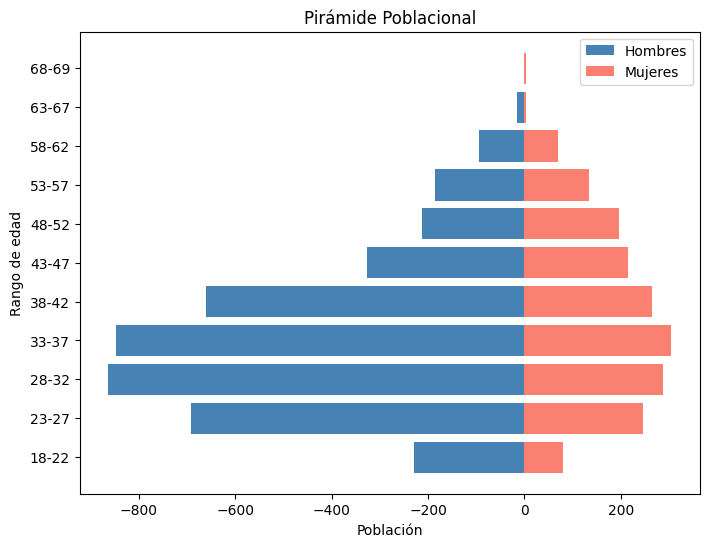

In [29]:
# Agrupar por rango y sexo (en minúsculas)
piramide = df.groupby(["RANGO_EDAD", "SEXO"], observed=False).size().unstack(fill_value=0)

# Asegurar columnas (por si falta alguna en algún rango)
if "hombre" not in piramide.columns:
    piramide["hombre"] = 0
if "mujer" not in piramide.columns:
    piramide["mujer"] = 0

# Pasar los hombres a valores negativos (para graficarlos a la izquierda)
piramide["hombre"] = -piramide["hombre"]

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(piramide.index, piramide["hombre"], color="steelblue", label="Hombres")
ax.barh(piramide.index, piramide["mujer"], color="salmon", label="Mujeres")

# Personalización
ax.set_xlabel("Población")
ax.set_ylabel("Rango de edad")
ax.set_title("Pirámide Poblacional")
ax.legend()

plt.show()

Se ve una pirámide poblacional con distribuciones similares en ambos géneros. Pero con una cantidad de cada muy desigual, lo cual complica el análisis demografico.

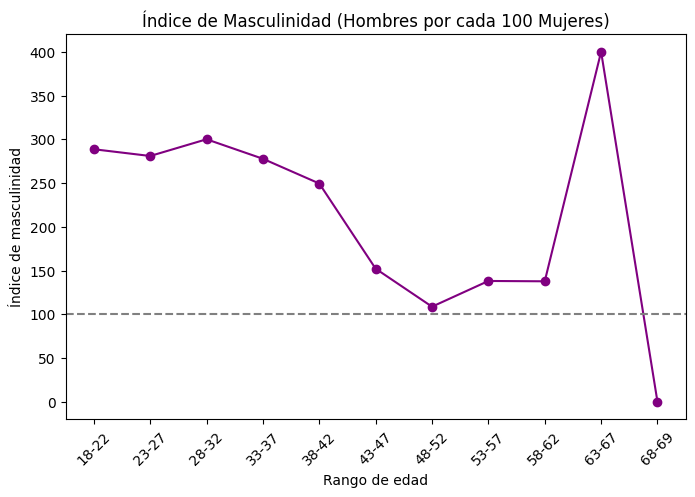

In [30]:
# Agrupar por rango y sexo (en minúsculas)
tabla = df.groupby(["RANGO_EDAD", "SEXO"], observed=False).size().unstack(fill_value=0)

# Asegurar columnas
if "hombre" not in tabla.columns:
    tabla["hombre"] = 0
if "mujer" not in tabla.columns:
    tabla["mujer"] = 0

# Calcular índice de masculinidad (hombres por cada 100 mujeres)
tabla["IndiceMasculinidad"] = (tabla["hombre"] / tabla["mujer"].replace(0, 1)) * 100

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(tabla.index.astype(str), tabla["IndiceMasculinidad"], marker="o", color="purple")
plt.axhline(100, color="gray", linestyle="--")
plt.title("Índice de Masculinidad (Hombres por cada 100 Mujeres)")
plt.xlabel("Rango de edad")
plt.ylabel("Índice de masculinidad")
plt.xticks(rotation=45)
plt.show()


Como se dijo antes, la cantidad de hombres por cada 100 mujeres es grande en los primeros rangos etarios pero se ve un cambio drástico en el último rango, debido a que no existe ningún individuo hombre en este.


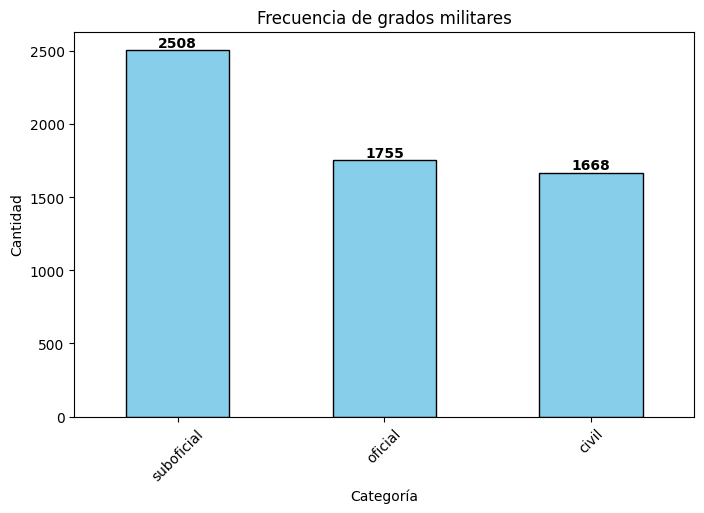

Grado militar más frecuente: suboficial


In [31]:
# Conteo total de grados militares
conteo_total = df["CATEGORIA"].value_counts()

plt.figure(figsize=(8,5))
bars = conteo_total.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Frecuencia de grados militares")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(conteo_total.values):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.show()

print("Grado militar más frecuente:", conteo_total.idxmax())

En los grados mólitares se evidencia una mayor cantidad de suboficiales, de forma muy notables, y cantidades similares en oficiales y civiles.

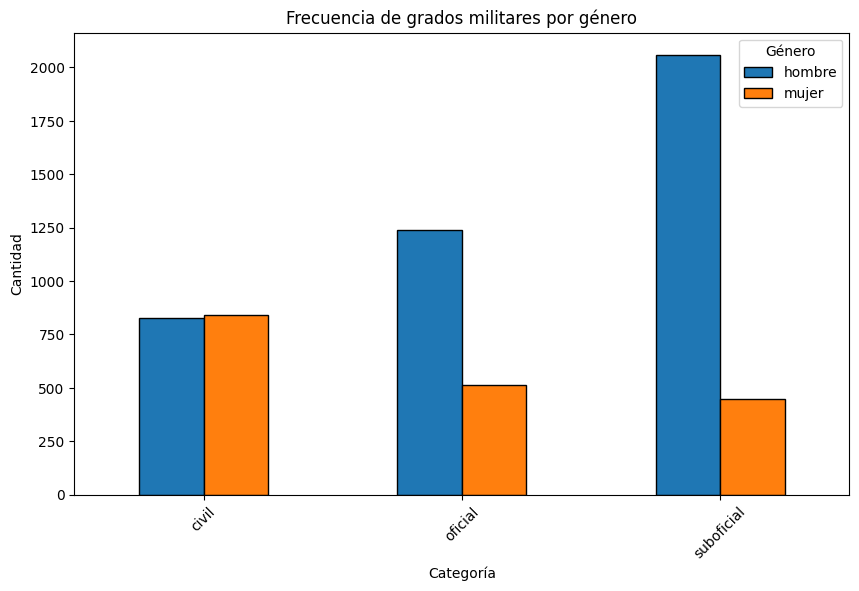

In [32]:
conteo_genero = df.groupby(["CATEGORIA", "SEXO"]).size().unstack(fill_value=0)

conteo_genero.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.title("Frecuencia de grados militares por género")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.show()


ANALISIS FAMILIAR 

=== INFORMACIÓN GENERAL ===
Total de registros: 5931
Total de columnas: 16

=== VARIABLES Y TIPOS DE DATO ===
                       Variable Tipo de Dato
                          EDAD2        int64
                           SEXO       object
 FRECUENCIA_VISITA_FAMILIAR...3       object
                   ESTADO_CIVIL       object
                          HIJOS       object
                   NUMERO_HIJOS        int64
                 HIJOS_EN_HOGAR        int64
                 RELACION_HIJOS       object
                       HERMANOS       object
          ESPECIFICACION_CASADO       object
          CASADO_FUERZA_MILITAR       object
           TIPO_RELACION_PAREJA       object
        RELACION_PAREJA_ESTABLE       object
   PRINCIPAL_NECESIDAD_FAMILIAR       object
         MALTRATO_INTRAFAMILIAR       object
FRECUENCIA_VISITA_FAMILIAR...17       object 

=== ANÁLISIS ESTADO CIVIL ===
ESTADO_CIVIL
casado        3485
soltero/a     2026
divorciado     239
separado       147
viud

C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="ESTADO_CIVIL", order=estado_civil_counts.index, palette="Set2")


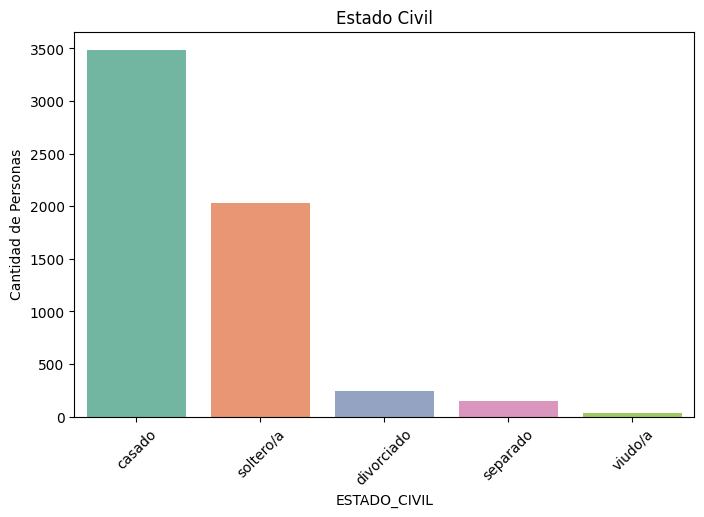

=== RELACIÓN EDAD - ESTADO CIVIL ===


C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ESTADO_CIVIL", y="EDAD2", palette="Pastel1")


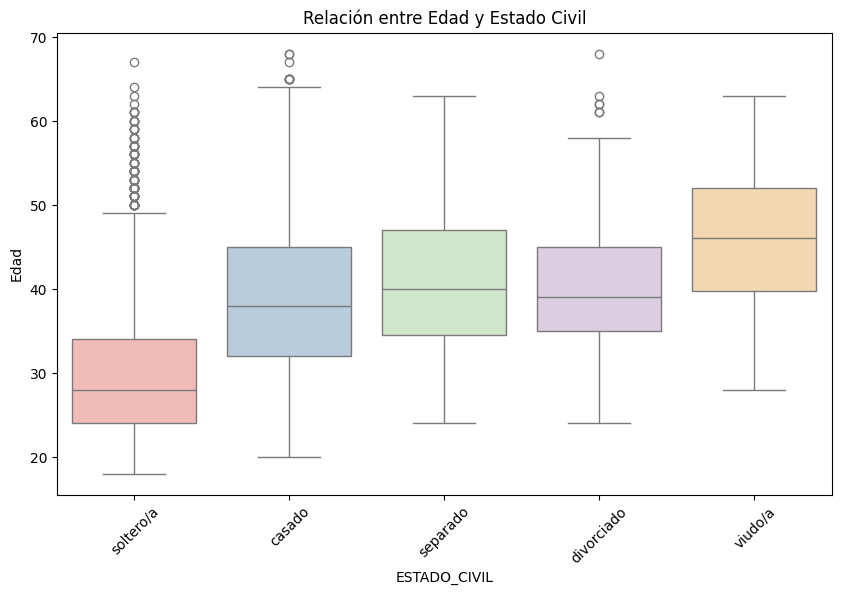

Edad promedio por estado civil:
ESTADO_CIVIL
casado        39
divorciado    40
separado      41
soltero/a     30
viudo/a       47
Name: EDAD2, dtype: int64 



C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")


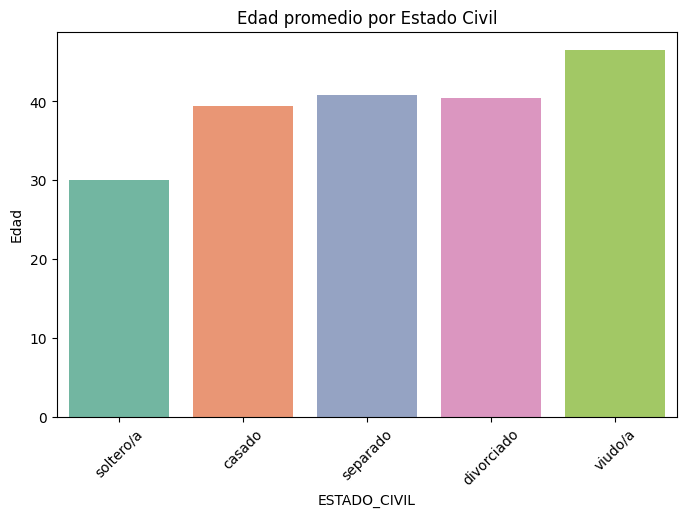

=== ANÁLISIS DE HIJOS ===
HIJOS
si    3181
no    2750
Name: count, dtype: int64
=== PATRONES FAMILIARES ===
Número de hijos mas frecuente: 1



C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NUMERO_HIJOS", data=df_hijos, palette="Set2")


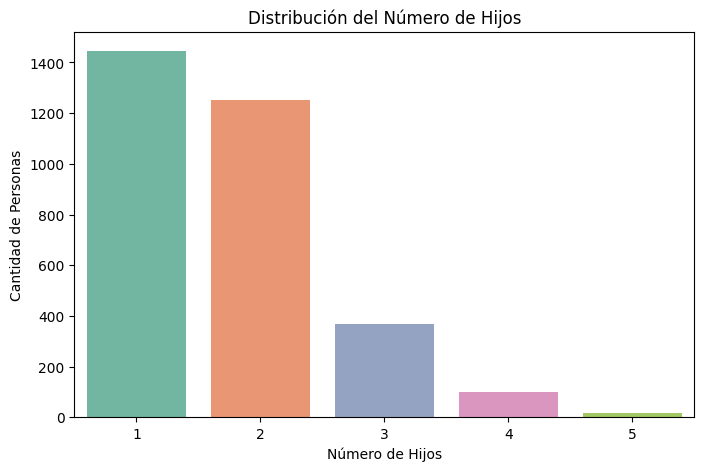

=== INFORMACIÓN SOBRE PERSONAS CON HIJOS ===
Total personas con hijos: 3181
=== TABLA CRUZADA: NÚMERO DE HIJOS vs HIJOS EN EL HOGAR ===
HIJOS_EN_HOGAR    0     1    2    3   4  5
NUMERO_HIJOS                              
1               281  1154    8    1   0  3
2               128   254  867    1   1  0
3                48    89  118  112   0  0
4                14    29   25   16  14  0
5                 4     7    3    3   1  0 

=== RELACIÓN CON LOS HIJOS ===
RELACION_HIJOS
cercana                  95.504558
cercana con conflicto     2.043383
distante                  1.791889
otro                      0.565860
conflictiva               0.094310
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_4132\4138230634.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_hijos, x="RELACION_HIJOS", palette="Set2",


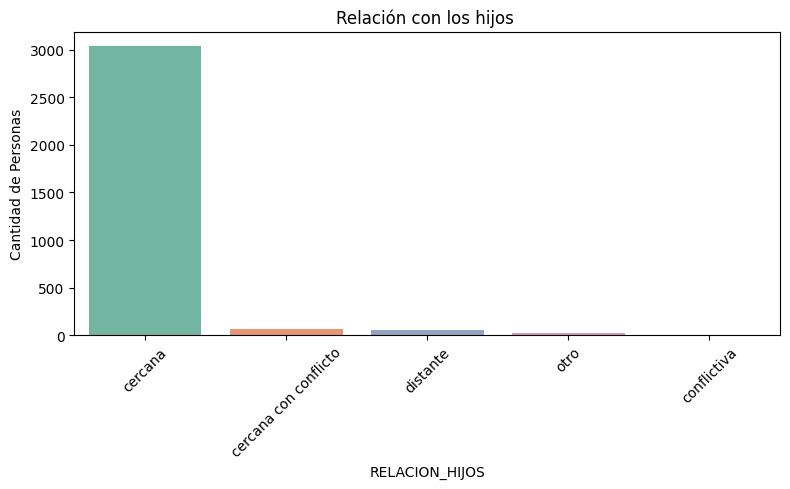

=== TABLA CRUZADA: RELACIÓN CON LOS HIJOS vs HIJOS EN EL HOGAR ===
HIJOS_EN_HOGAR           0     1    2    3   4  5
RELACION_HIJOS                                   
cercana                408  1486  998  127  16  3
cercana con conflicto   13    29   17    6   0  0
conflictiva              0     3    0    0   0  0
distante                46     6    5    0   0  0
otro                     8     9    1    0   0  0 

=== TABLA CRUZADA: RELACIÓN DE PAREJA ESTABLE vs TIPO DE RELACIÓN vs NECESIDAD FAMILIAR ===
PRINCIPAL_NECESIDAD_FAMILIAR                    acompanamiento psicosocial  \
RELACION_PAREJA_ESTABLE TIPO_RELACION_PAREJA                                 
no                      no responde                                     42   
si                      cercana                                         48   
                        cercana con conflicto                           11   
                        conflictiva - agresion                           0   
                     

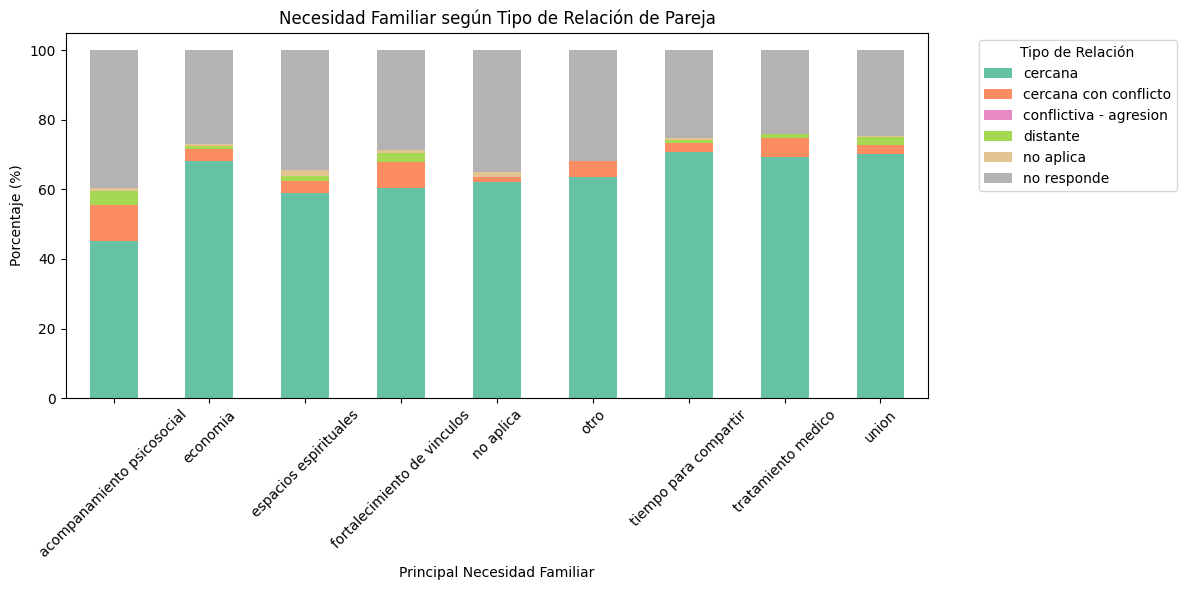

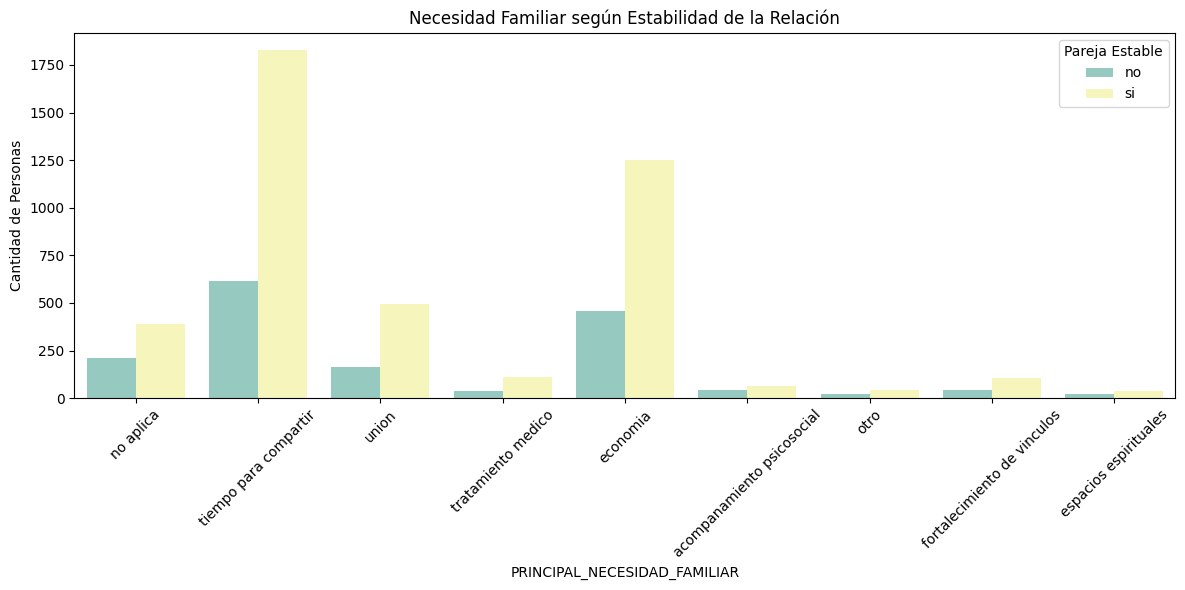

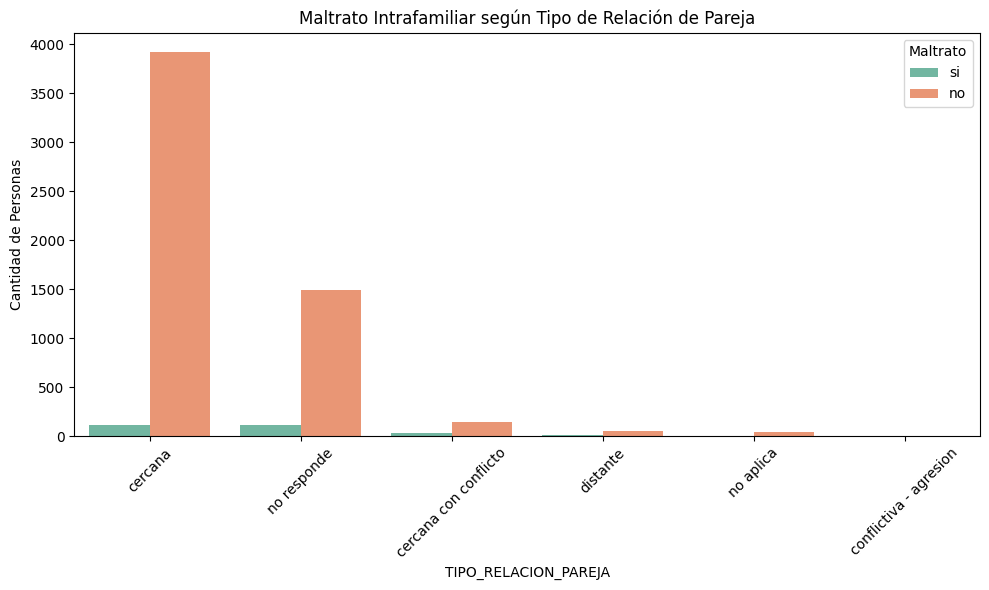

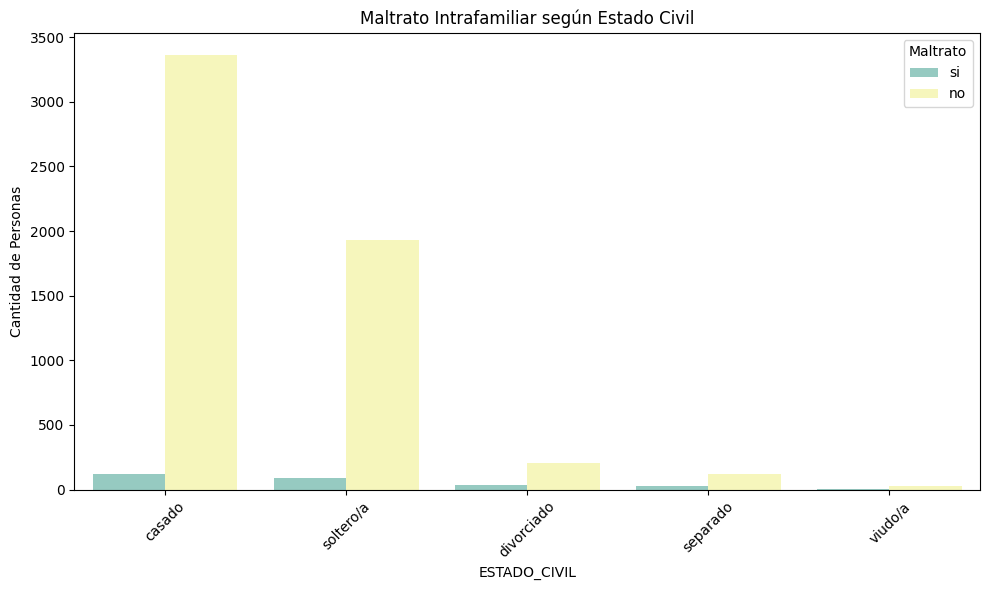

=== PORCENTAJE DE MALTRATO POR TIPO DE RELACIÓN Y ESTADO CIVIL ===
MALTRATO_INTRAFAMILIAR                  no     si
TIPO_RELACION_PAREJA   ESTADO_CIVIL              
cercana                casado         97.7    2.3
                       divorciado     91.8    8.2
                       separado       92.1    7.9
                       soltero/a      95.6    4.4
                       viudo/a        87.5   12.5
cercana con conflicto  casado         79.3   20.7
                       divorciado     50.0   50.0
                       separado      100.0    0.0
                       soltero/a      95.8    4.2
conflictiva - agresion casado          0.0  100.0
                       divorciado    100.0    0.0
distante               casado         88.6   11.4
                       divorciado    100.0    0.0
                       separado      100.0    0.0
                       soltero/a      88.9   11.1
no aplica              casado        100.0    0.0
                       divorciado

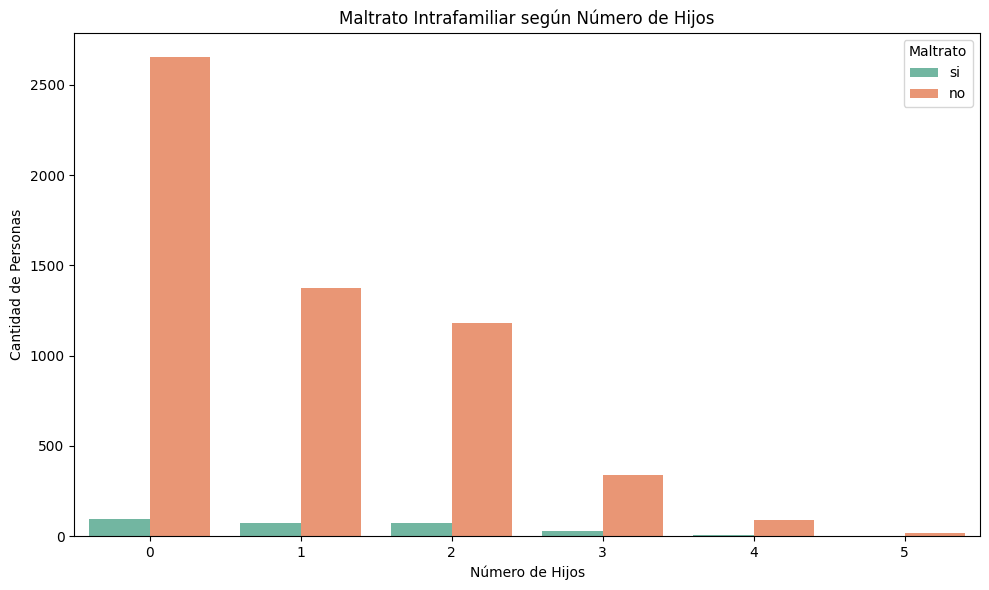

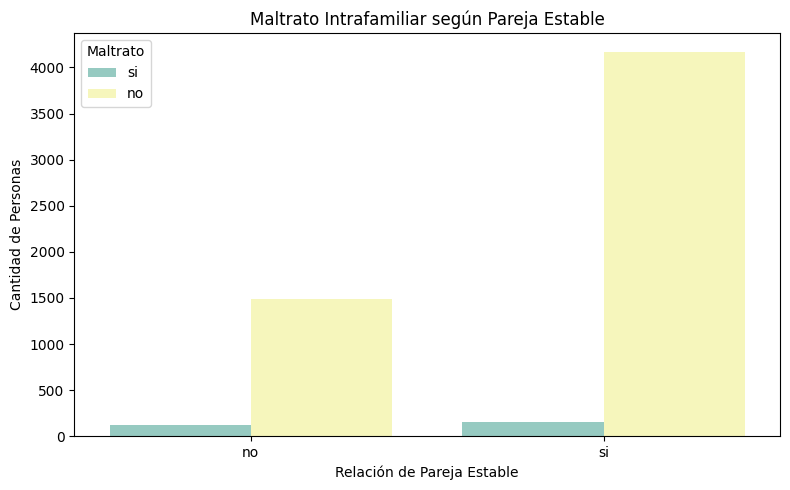

=== TABLA CRUZADA: MALTRATO vs PAREJA ESTABLE vs NÚMERO DE HIJOS ===
MALTRATO_INTRAFAMILIAR                  no   si  Total
RELACION_PAREJA_ESTABLE NUMERO_HIJOS                  
no                      0             1080   45   1125
                        1              243   41    284
                        2              114   22    136
                        3               36    7     43
                        4               14    2     16
                        5                2    0      2
si                      0             1576   49   1625
                        1             1133   30   1163
                        2             1065   50   1115
                        3              302   22    324
                        4               76    6     82
                        5               15    1     16
Total                                 5656  275   5931 

=== PORCENTAJE DE MALTRATO POR NÚMERO DE HIJOS Y PAREJA ESTABLE ===
MALTRATO_INTRAFAMILIAR              

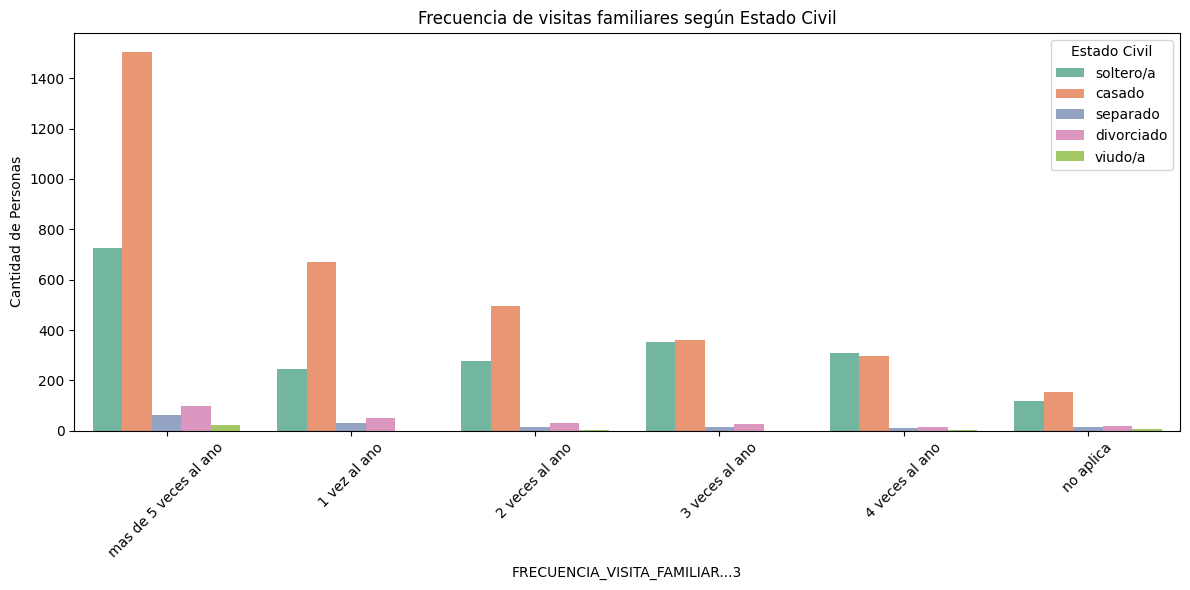

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# base de datos
df = pd.read_excel("C:/Users/User/Downloads/Base quitando faltantes.xlsx")


print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}\n")

# variables
print("=== VARIABLES Y TIPOS DE DATO ===")
variables_info = pd.DataFrame({
    "Variable": df.columns,
    "Tipo de Dato": df.dtypes.astype(str).values
})
print(variables_info.to_string(index=False), "\n")
# ANÁLISIS ESTADO CIVIL
print("=== ANÁLISIS ESTADO CIVIL ===")
estado_civil_counts = df["ESTADO_CIVIL"].value_counts(dropna=False)
print(estado_civil_counts)

# Porcentaje casados
if "CASADO" in estado_civil_counts.index or "casado" in estado_civil_counts.index:
    casados = estado_civil_counts.get("CASADO", 0) + estado_civil_counts.get("casado", 0)
    porcentaje_casados = (casados / len(df)) * 100
    print(f"\n Porcentaje de personal casado: {porcentaje_casados:.2f}%\n")

# Gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="ESTADO_CIVIL", order=estado_civil_counts.index, palette="Set2")
plt.title("Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.show()
print("=== RELACIÓN EDAD - ESTADO CIVIL ===")

if "EDAD2" in df.columns:
    # Redondear la edad a enteros
    df["EDAD2"] = df["EDAD2"].round(0).astype(int)

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="ESTADO_CIVIL", y="EDAD2", palette="Pastel1")
    plt.title("Relación entre Edad y Estado Civil")
    plt.xticks(rotation=45)
    plt.ylabel("Edad")
    plt.show()

    # Edad promedio por estado civil
    edad_promedio = df.groupby("ESTADO_CIVIL")["EDAD2"].mean().round(0).astype(int)
    print("Edad promedio por estado civil:")
    print(edad_promedio, "\n")

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="ESTADO_CIVIL", y="EDAD2", estimator="mean", ci=None, palette="Set2")
plt.title("Edad promedio por Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Edad")
plt.show()
# ANÁLISIS DE HIJOS
print("=== ANÁLISIS DE HIJOS ===")
print(df["HIJOS"].value_counts(dropna=False))

print("=== PATRONES FAMILIARES ===")

# Solo las personas que SÍ tienen hijos
if "HIJOS" in df.columns and "NUMERO_HIJOS" in df.columns:
    df_hijos = df[(df["HIJOS"] == "si") & (df["NUMERO_HIJOS"].notna())]

    if not df_hijos.empty:
        # Moda en lugar de promedio
        moda_hijos = df_hijos["NUMERO_HIJOS"].mode().iloc[0]
        print(f"Número de hijos mas frecuente: {moda_hijos}\n")

        # Distribución del número de hijos
        plt.figure(figsize=(8, 5))
        sns.countplot(x="NUMERO_HIJOS", data=df_hijos, palette="Set2")
        plt.title("Distribución del Número de Hijos")
        plt.xlabel("Número de Hijos")
        plt.ylabel("Cantidad de Personas")
        plt.show()


df_hijos = df[df["HIJOS"] == "si"].copy()

print("=== INFORMACIÓN SOBRE PERSONAS CON HIJOS ===")
print(f"Total personas con hijos: {len(df_hijos)}")

# Tabla cruzada: Número de hijos vs Hijos en el hogar

tabla_hogar = pd.crosstab(df_hijos["NUMERO_HIJOS"], df_hijos["HIJOS_EN_HOGAR"])
print("=== TABLA CRUZADA: NÚMERO DE HIJOS vs HIJOS EN EL HOGAR ===")
print(tabla_hogar, "\n")

# Relación con los hijos

print("=== RELACIÓN CON LOS HIJOS ===")
print(df_hijos["RELACION_HIJOS"].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_hijos, x="RELACION_HIJOS", palette="Set2",
              order=df_hijos["RELACION_HIJOS"].value_counts().index)
plt.title("Relación con los hijos ")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================
# Tabla cruzada: Relación con hijos vs Número de hijos en el hogar
# ==============================
tabla_relacion = pd.crosstab(df_hijos["RELACION_HIJOS"], df_hijos["HIJOS_EN_HOGAR"])
print("=== TABLA CRUZADA: RELACIÓN CON LOS HIJOS vs HIJOS EN EL HOGAR ===")
print(tabla_relacion, "\n")

# TABLA CRUZADA
print("=== TABLA CRUZADA: RELACIÓN DE PAREJA ESTABLE vs TIPO DE RELACIÓN vs NECESIDAD FAMILIAR ===")
tabla = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["TIPO_RELACION_PAREJA"]],
    columns=df["PRINCIPAL_NECESIDAD_FAMILIAR"],
    margins=True, margins_name="Total"
)
print(tabla, "\n")




tabla = pd.crosstab(df["PRINCIPAL_NECESIDAD_FAMILIAR"], 
                    df["TIPO_RELACION_PAREJA"], 
                    normalize="index") * 100

# Gráfico de barras apiladas
tabla.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")

plt.title("Necesidad Familiar según Tipo de Relación de Pareja")
plt.xlabel("Principal Necesidad Familiar")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Relación", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



# Necesidad familiar según estabilidad de pareja

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="PRINCIPAL_NECESIDAD_FAMILIAR", hue="RELACION_PAREJA_ESTABLE", palette="Set3")
plt.title("Necesidad Familiar según Estabilidad de la Relación")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Pareja Estable")
plt.tight_layout()
plt.show()

# GRÁFICO 1: Maltrato según tipo de relación

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="TIPO_RELACION_PAREJA", hue="MALTRATO_INTRAFAMILIAR", palette="Set2",
              order=df["TIPO_RELACION_PAREJA"].value_counts().index)
plt.title("Maltrato Intrafamiliar según Tipo de Relación de Pareja")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()


# GRÁFICO 2: Maltrato según estado civil

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="ESTADO_CIVIL", hue="MALTRATO_INTRAFAMILIAR", palette="Set3",
              order=df["ESTADO_CIVIL"].value_counts().index)
plt.title("Maltrato Intrafamiliar según Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# PORCENTAJES

tabla_pct = pd.crosstab(
    index=[df["TIPO_RELACION_PAREJA"], df["ESTADO_CIVIL"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    normalize="index"
) * 100

print("=== PORCENTAJE DE MALTRATO POR TIPO DE RELACIÓN Y ESTADO CIVIL ===")
print(tabla_pct.round(1), "\n")

# GRÁFICO 1: Maltrato según número de hijos

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="NUMERO_HIJOS", hue="MALTRATO_INTRAFAMILIAR", palette="Set2")
plt.title("Maltrato Intrafamiliar según Número de Hijos")
plt.xlabel("Número de Hijos")
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# GRÁFICO 2: Maltrato según pareja estable

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="RELACION_PAREJA_ESTABLE", hue="MALTRATO_INTRAFAMILIAR", palette="Set3")
plt.title("Maltrato Intrafamiliar según Pareja Estable")
plt.xlabel("Relación de Pareja Estable")
plt.ylabel("Cantidad de Personas")
plt.legend(title="Maltrato")
plt.tight_layout()
plt.show()

# TABLA CRUZADA
print("=== TABLA CRUZADA: MALTRATO vs PAREJA ESTABLE vs NÚMERO DE HIJOS ===")
tabla = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["NUMERO_HIJOS"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    margins=True, margins_name="Total"
)
print(tabla, "\n")

# PORCENTAJES 
tabla_pct = pd.crosstab(
    index=[df["RELACION_PAREJA_ESTABLE"], df["NUMERO_HIJOS"]],
    columns=df["MALTRATO_INTRAFAMILIAR"],
    normalize="index"
) * 100

print("=== PORCENTAJE DE MALTRATO POR NÚMERO DE HIJOS Y PAREJA ESTABLE ===")
print(tabla_pct.round(1), "\n")

# GRÁFICO DE BARRAS

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="FRECUENCIA_VISITA_FAMILIAR...3",
    hue="ESTADO_CIVIL",
    palette="Set2",
    order=df["FRECUENCIA_VISITA_FAMILIAR...3"].value_counts().index
)
plt.title("Frecuencia de visitas familiares según Estado Civil")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de Personas")
plt.legend(title="Estado Civil")
plt.tight_layout()
plt.show()


##  Resultados

###  Estado civil
La mayoría de los hogares se estructuran en **parejas casadas**.  

###  Edad y estado civil
Se observan **patrones coherentes con los ciclos de vida familiar**:  
- Solteros en edades jóvenes  
- Casados en edades medias  
- Viudos/separados en edades mayores  

###  Presencia de hijos
- Tendencia hacia **familias pequeñas** (1 o 2 hijos).  
- Existe un fuerte **vínculo afectivo positivo** en la mayoría de los hogares.  

###  Principales necesidades familiares identificadas
- Apoyo económico  
- Tiempo para compartir  

###  Maltrato intrafamiliar
- Los casos de maltrato son minoría, pero existen.  
- Aunque no es el fenómeno predominante, su presencia lo convierte en un **factor de riesgo crítico** para el bienestar familiar.  

###  Frecuencia de visitas familiares
La mayoría de personas visita a la familia **más de 5 veces al año**. 

<!-- ##  Resultados

###  Estado civil
La mayoría de los hogares se estructuran en **parejas casadas**.  

###  Edad y estado civil
Se observan **patrones coherentes con los ciclos de vida familiar**:  
- Solteros en edades jóvenes  
- Casados en edades medias  
- Viudos/separados en edades mayores  

###  Presencia de hijos
- Tendencia hacia **familias pequeñas** (1 o 2 hijos).  
- Existe un fuerte **vínculo afectivo positivo** en la mayoría de los hogares.  

###  Principales necesidades familiares identificadas
- Apoyo económico  
- Tiempo para compartir  

###  Maltrato intrafamiliar
- Los casos de maltrato son minoría, pero existen.    
- Aunque no es el fenómeno predominante, su presencia lo convierte en un **factor de riesgo crítico** para el bienestar familiar.  

###  Frecuencia de visitas familiares -->